Generally accepted that it is challenging to keep a track of developments relatedto packages in R..  
It receives less coverage than Keras or pytorch or sci kit learn packages..

In [1]:
install.packages(c('caret', 'skimr', 'RANN', 'randomForest', 'fastAdaboost', 'gbm', 'xgboost', 'caretEnsemble', 'C50', 'earth'))

Warning message:
"package 'skimr' is not available (for R version 3.4.3)"

package 'caret' successfully unpacked and MD5 sums checked
package 'RANN' successfully unpacked and MD5 sums checked
package 'randomForest' successfully unpacked and MD5 sums checked
package 'fastAdaboost' successfully unpacked and MD5 sums checked
package 'gbm' successfully unpacked and MD5 sums checked
package 'xgboost' successfully unpacked and MD5 sums checked
package 'caretEnsemble' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked
package 'earth' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IBM_ADMIN\AppData\Local\Temp\RtmpWMGc29\downloaded_packages


Steps invvoled.. 
Data Preparation and Preprocessing  
Visualize the importance of variables  
Feature Selection using RFE  
Training and Tuning the model  
Ensembling the predictions  

The Orange Juice Data, originally made available in the ISLR package.  
The goal of this dataset is to predict which of the two brands of orange juices did the customers buy.  
1070 rows with 18 columns  
Response variable is ‘Purchase’ which takes either the value ‘CH'(citrus hill) or ‘MM'(minute maid).  

In [18]:
install.packages("devtools")

also installing the dependencies 'memoise', 'git2r'



package 'memoise' successfully unpacked and MD5 sums checked
package 'git2r' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IBM_ADMIN\AppData\Local\Temp\RtmpWMGc29\downloaded_packages


In [19]:
devtools::install_github("ropenscilabs/skimr")

from URL https://api.github.com/repos/ropenscilabs/skimr/zipball/master
Installing skimr
Installing 1 package: pander


package 'pander' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IBM_ADMIN\AppData\Local\Temp\RtmpWMGc29\downloaded_packages


"C:/Users/IBM_ADMIN/Anaconda3/lib/R/bin/x64/R" --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  "C:/Users/IBM_ADMIN/AppData/Local/Temp/RtmpWMGc29/devtoolse544f023c29/ropenscilabs-skimr-a37dc16"  \
  --library="C:/Users/IBM_ADMIN/Anaconda3/Lib/R/library" --install-tests 



In [15]:
install.packages("skimr")

Warning message:
"package 'skimr' is not available (for R version 3.4.3)"

In [3]:
# Load the caret package
library(caret)


Loading required package: lattice
Loading required package: ggplot2


In [6]:
# Import dataset
orange <- read.csv('https://raw.githubusercontent.com/selva86/datasets/master/orange_juice_withmissing.csv')

# Structure of the dataframe
str(orange)

'data.frame':	1070 obs. of  18 variables:
 $ Purchase      : Factor w/ 2 levels "CH","MM": 1 1 1 2 1 1 1 1 1 1 ...
 $ WeekofPurchase: int  237 239 245 227 228 230 232 234 235 238 ...
 $ StoreID       : int  1 1 1 1 7 7 7 7 7 7 ...
 $ PriceCH       : num  1.75 1.75 1.86 1.69 1.69 1.69 1.69 1.75 1.75 1.75 ...
 $ PriceMM       : num  1.99 1.99 2.09 1.69 1.69 1.99 1.99 1.99 1.99 1.99 ...
 $ DiscCH        : num  0 0 0.17 0 0 0 0 0 0 0 ...
 $ DiscMM        : num  0 0.3 0 0 0 0 0.4 0.4 0.4 0.4 ...
 $ SpecialCH     : int  0 0 0 0 0 0 1 1 0 0 ...
 $ SpecialMM     : int  0 1 0 0 0 1 1 0 0 0 ...
 $ LoyalCH       : num  0.5 0.6 0.68 0.4 0.957 ...
 $ SalePriceMM   : num  1.99 1.69 2.09 1.69 1.69 1.99 1.59 1.59 1.59 1.59 ...
 $ SalePriceCH   : num  1.75 1.75 1.69 1.69 1.69 1.69 1.69 1.75 1.75 1.75 ...
 $ PriceDiff     : num  0.24 -0.06 0.4 0 0 0.3 -0.1 -0.16 -0.16 -0.16 ...
 $ Store7        : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 2 2 2 2 2 ...
 $ PctDiscMM     : num  0 0.151 0 0 0 ...
 $ PctDiscC

In [7]:
# See top 6 rows and 10 columns
head(orange[, 1:10])

Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH
CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000
CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000
CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000
MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000
CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535
CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228


In [8]:
# Create the training and test datasets
set.seed(100)

In [9]:
# Get row numbers for the training data
trainRowNumbers <- createDataPartition(orange$Purchase, p=0.8, list=FALSE)

In [11]:
# Create the training  dataset
trainData <- orange[trainRowNumbers,]

In [12]:
# Create the test dataset
testData <- orange[-trainRowNumbers,]

In [13]:
# Store X and Y for later use.
x = trainData[, 2:18]
y = trainData$Purchase

skimr::skim_to_wide() produces a nice dataframe containing the descriptive stats of each of the columns

In [20]:
library(skimr)
skimmed <- skim_to_wide(trainData)
skimmed[, c(1:5, 9:11, 13, 15:16)]

type,variable,missing,complete,n,mean,sd,p0,p50,p100,hist
factor,Purchase,0,857,857,NA,NA,NA,NA,NA,NA
factor,Store7,0,857,857,NA,NA,NA,NA,NA,NA
integer,SpecialCH,2,855,857,0.16,0.36,0,0,1,<U+2587><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2582>
integer,SpecialMM,4,853,857,0.15,0.36,0,0,1,<U+2587><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2582>
integer,STORE,2,855,857,1.66,1.44,0,2,4,<U+2587><U+2583><U+2581><U+2585><U+2581><U+2585><U+2581><U+2583>
integer,StoreID,1,856,857,3.95,2.29,1,3,7,<U+2583><U+2585><U+2585><U+2583><U+2581><U+2581><U+2581><U+2587>
integer,WeekofPurchase,0,857,857,254.17,15.59,227,257,278,<U+2586><U+2586><U+2585><U+2583><U+2586><U+2587><U+2586><U+2587>
numeric,DiscCH,2,855,857,0.054,0.12,0,0,0.5,<U+2587><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581><U+2581>
numeric,DiscMM,3,854,857,0.12,0.21,0,0,0.8,<U+2587><U+2581><U+2581><U+2582><U+2581><U+2581><U+2581><U+2581>
numeric,ListPriceDiff,0,857,857,0.22,0.11,0,0.24,0.44,<U+2582><U+2582><U+2582><U+2582><U+2587><U+2586><U+2581><U+2581>


There are NAs and missing values...

In [21]:
# Create the knn imputation model on the training data
preProcess_missingdata_model <- preProcess(trainData, method='knnImpute')
preProcess_missingdata_model

Created from 828 samples and 18 variables

Pre-processing:
  - centered (16)
  - ignored (2)
  - 5 nearest neighbor imputation (16)
  - scaled (16)


#Coolness

In [22]:
# Use the imputation model to predict the values of missing data points
library(RANN)  # required for knnInpute
trainData <- predict(preProcess_missingdata_model, newdata = trainData)
anyNA(trainData)

[1] FALSE

In [24]:
# One-Hot Encoding
# Creating dummy variables is converting a categorical variable to as many binary variables as here are categories.
# dummy vars is a funciton in caret R, 
# y = bx + c means that y ~ x
# ~ . means use other columns that are not otherwise used...
dummies_model <- dummyVars(Purchase ~ ., data=trainData)

In [25]:
# Create the dummy variables using predict. The Y variable (Purchase) will not be present in trainData_mat.
trainData_mat <- predict(dummies_model, newdata = trainData)

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$lvls):
"variable 'Purchase' is not a factor"

In [26]:
# # Convert to dataframe
trainData <- data.frame(trainData_mat)

In [27]:
# # See the structure of the new dataset
str(trainData)

'data.frame':	857 obs. of  18 variables:
 $ WeekofPurchase: num  -1.1 -1.74 -1.68 -1.29 -1.04 ...
 $ StoreID       : num  -1.29 -1.29 1.33 1.33 1.33 ...
 $ PriceCH       : num  -1.14 -1.73 -1.73 -1.14 -1.14 ...
 $ PriceMM       : num  -0.688 -2.898 -2.898 -0.688 -0.688 ...
 $ DiscCH        : num  -0.452 -0.452 -0.452 -0.452 -0.452 ...
 $ DiscMM        : num  -0.582 -0.582 -0.582 1.341 1.341 ...
 $ SpecialCH     : num  -0.429 -0.429 -0.429 2.329 -0.429 ...
 $ SpecialMM     : num  -0.42 -0.42 -0.42 -0.42 -0.42 ...
 $ LoyalCH       : num  -0.205 -0.525 1.256 1.324 1.35 ...
 $ SalePriceMM   : num  0.113 -1.101 -1.101 -1.506 -1.506 ...
 $ SalePriceCH   : num  -0.431 -0.844 -0.844 -0.431 -0.431 ...
 $ PriceDiff     : num  0.341 -0.563 -0.563 -1.165 -1.165 ...
 $ Store7.No     : num  1 1 0 0 0 0 0 0 0 1 ...
 $ Store7.Yes    : num  0 0 1 1 1 1 1 1 1 0 ...
 $ PctDiscMM     : num  -0.588 -0.588 -0.588 1.447 1.447 ...
 $ PctDiscCH     : num  -0.448 -0.448 -0.448 -0.448 -0.448 ...
 $ ListPriceDiff

In [28]:
preProcess_range_model <- preProcess(trainData, method='range')
trainData <- predict(preProcess_range_model, newdata = trainData)

### Other types of preprocessing available in R for the data ...

    range: Normalize values so it ranges between 0 and 1
    center: Subtract Mean
    scale: Divide by standard deviation
    BoxCox: Remove skewness leading to normality. Values must be > 0
    YeoJohnson: Like BoxCox, but works for negative values.
    expoTrans: Exponential transformation, works for negative values.
    pca: Replace with principal components
    ica: Replace with independent components
    spatialSign: Project the data to a unit circle

In [29]:
# Append the Y variable
trainData$Purchase <- y

In [31]:
apply(trainData[, 1:10], 2, FUN=function(x){c('min'=min(x), 'max'=max(x))})

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM
min,0,0,0,0,0,0,0,0,0,0
max,1,1,1,1,1,1,1,1,1,1


Thus all the predictors now range between 0 and 1.

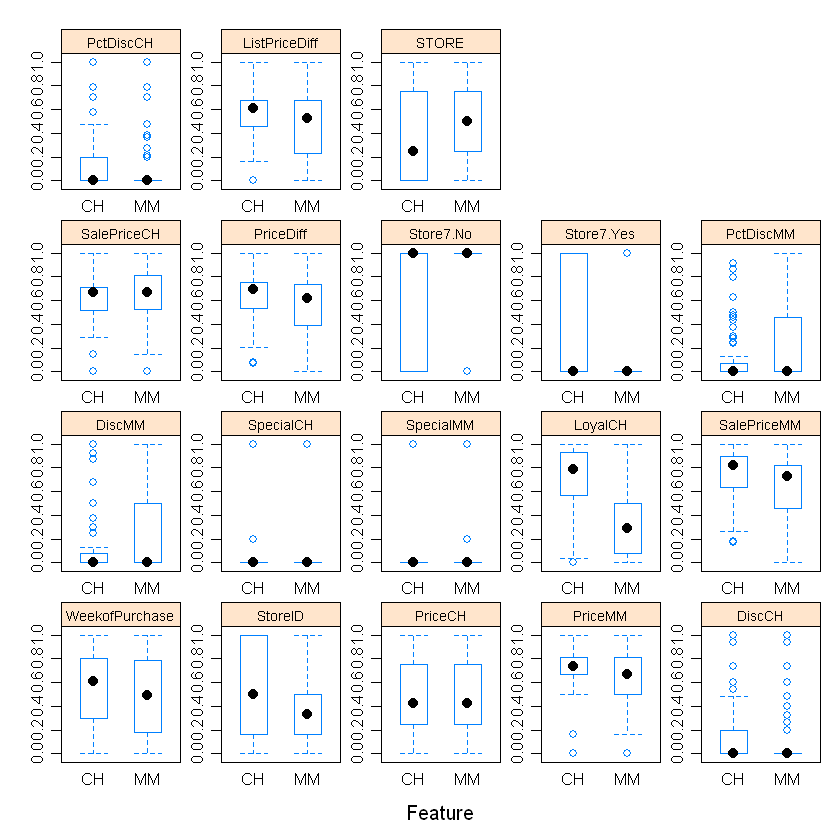

In [33]:
featurePlot(x = trainData[, 1:18], 
            y = trainData$Purchase, 
            plot = "box",
            strip=strip.custom(par.strip.text=list(cex=.7)),
            scales = list(x = list(relation="free"), 
                          y = list(relation="free")))

LoyalCH has startk differences in the placement of the mean and the box...  
eyeballing it indicates that it is a significant factor to the OP

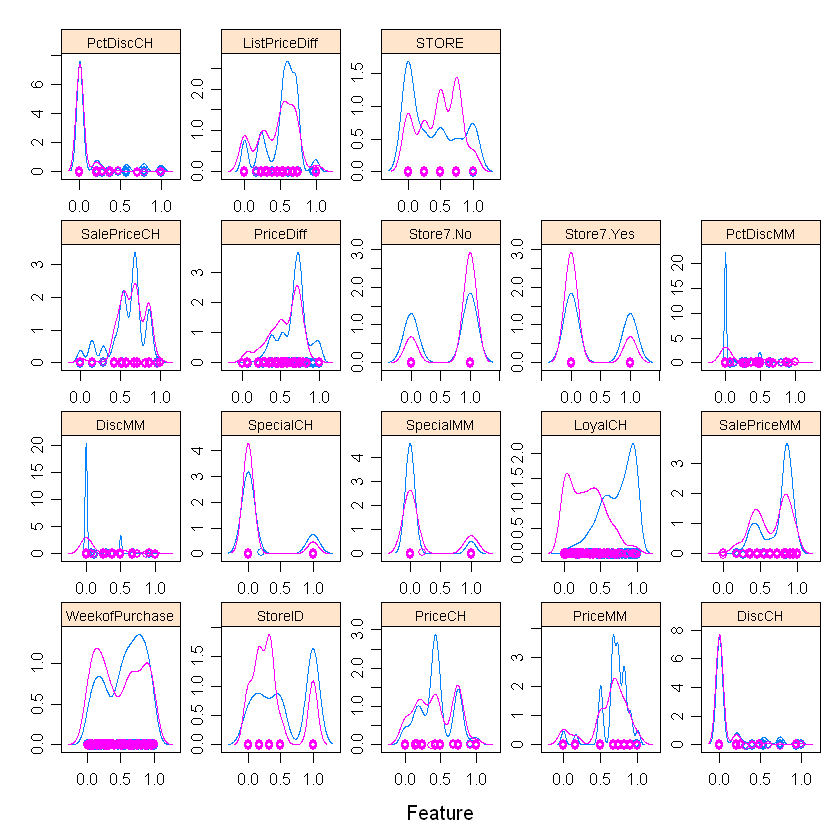

In [34]:
featurePlot(x = trainData[, 1:18], 
            y = trainData$Purchase, 
            plot = "density",
            strip=strip.custom(par.strip.text=list(cex=.7)),
            scales = list(x = list(relation="free"), 
                          y = list(relation="free")))

Check for stark difference both in terms of the   
height (kurtosis) and  How much more peaky it is relative to a NDistributionm   
placement (skewness): Where the mean is relative to the mean of a NDistribution

Eyeballing the plots we can see: week of purchase. loyal ch, and store no 7 yes/no are imp  
we can only determine what is important.. this way..   
we cant say what isnt important.. this way  

Most machine learning algorithms are able to determine what features are important to predict the Y.   
In some scenarios, need to be careful to include only variables that may be significantly important
and makes strong business sense.  
in banking, economics and financial institutions

Other use cases for these kind of feature extraction...  
exploratory analysis to determine important predictors and report it as a metric in your analytics dashboard. 

Recursive feature elimination (RFE)

In [37]:
set.seed(100)
options(warn=-1)

subsets <- c(1:5, 10, 15, 18)

ctrl <- rfeControl(functions = rfFuncs,
                   method = "repeatedcv",
                   repeats = 5,
                   verbose = FALSE)

lmProfile <- rfe(x=trainData[, 1:18], y=trainData$Purchase,
                 sizes = subsets,
                 rfeControl = ctrl)

lmProfile

Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Recursive feature selection

Outer resampling method: Cross-Validated (10 fold, repeated 5 times) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.7433 0.4554    0.04107 0.08692         
         2   0.8143 0.6063    0.04037 0.08559         
         3   0.8187 0.6147    0.04194 0.08896        *
         4   0.8058 0.5904    0.04253 0.08750         
         5   0.7988 0.5743    0.04379 0.09258         
        10   0.8024 0.5810    0.04464 0.09557         
        15   0.8070 0.5879    0.04215 0.09079         
        18   0.8065 0.5879    0.03882 0.08297         

The top 3 variables (out of 3):
   LoyalCH, PriceDiff, StoreID


sizes determines what all model sizes (the number of most important features) the rfe should consider. In above case, it iterates models of size 1 to 5, 10, 15 and 18  
subsets variable.

ctrl object houses the rfectrl parameter/object   
repeatedcv repeated cross validaiton k means kind   
done 5 times.. 

Kappa here is cohens kappa (verify) a measure of inter rater agreement  
Rfe indicates that a model of 3 variables is enough to predict the op  
It doesn't mean that one should neglect the other variables especially when there is evidence that there is information contained in rest of the variables to explain the relationship between x and y  
And furhter this is a small data set which doesnt give several of the smaller variables enough clout to weigh in 

The best part of caret...  
All models under one umbrella ...
No need of running pillar to post for the updates unde individual algorithms..   
Man that s a sore point in python :P

In [38]:
# See available algorithms in caret
modelnames <- paste(names(getModelInfo()), collapse=',  ')
modelnames

[1] "ada,  AdaBag,  AdaBoost.M1,  adaboost,  amdai,  ANFIS,  avNNet,  awnb,  awtan,  bag,  bagEarth,  bagEarthGCV,  bagFDA,  bagFDAGCV,  bam,  bartMachine,  bayesglm,  binda,  blackboost,  blasso,  blassoAveraged,  bridge,  brnn,  BstLm,  bstSm,  bstTree,  C5.0,  C5.0Cost,  C5.0Rules,  C5.0Tree,  cforest,  chaid,  CSimca,  ctree,  ctree2,  cubist,  dda,  deepboost,  DENFIS,  dnn,  dwdLinear,  dwdPoly,  dwdRadial,  earth,  elm,  enet,  evtree,  extraTrees,  fda,  FH.GBML,  FIR.DM,  foba,  FRBCS.CHI,  FRBCS.W,  FS.HGD,  gam,  gamboost,  gamLoess,  gamSpline,  gaussprLinear,  gaussprPoly,  gaussprRadial,  gbm_h2o,  gbm,  gcvEarth,  GFS.FR.MOGUL,  GFS.GCCL,  GFS.LT.RS,  GFS.THRIFT,  glm.nb,  glm,  glmboost,  glmnet_h2o,  glmnet,  glmStepAIC,  gpls,  hda,  hdda,  hdrda,  HYFIS,  icr,  J48,  JRip,  kernelpls,  kknn,  knn,  krlsPoly,  krlsRadial,  lars,  lars2,  lasso,  lda,  lda2,  leapBackward,  leapForward,  leapSeq,  Linda,  lm,  lmStepAIC,  LMT,  loclda,  logicBag,  LogitBoost,  logreg,  lssvmLinear,  lssvmPoly,  lssvmRadial,  lvq,  M5,  M5Rules,  manb,  mda,  Mlda,  mlp,  mlpML,  mlpSGD,  mlpWeightDecay,  mlpWeightDecayML,  monmlp,  msaenet,  multinom,  naive_bayes,  nb,  nbDiscrete,  nbSearch,  neuralnet,  nnet,  nnls,  nodeHarvest,  oblique.tree,  OneR,  ordinalNet,  ORFlog,  ORFpls,  ORFridge,  ORFsvm,  ownn,  pam,  parRF,  PART,  partDSA,  pcaNNet,  pcr,  pda,  pda2,  penalized,  PenalizedLDA,  plr,  pls,  plsRglm,  polr,  ppr,  PRIM,  protoclass,  pythonKnnReg,  qda,  QdaCov,  qrf,  qrnn,  randomGLM,  ranger,  rbf,  rbfDDA,  Rborist,  rda,  regLogistic,  relaxo,  rf,  rFerns,  RFlda,  rfRules,  ridge,  rlda,  rlm,  rmda,  rocc,  rotationForest,  rotationForestCp,  rpart,  rpart1SE,  rpart2,  rpartCost,  rpartScore,  rqlasso,  rqnc,  RRF,  RRFglobal,  rrlda,  RSimca,  rvmLinear,  rvmPoly,  rvmRadial,  SBC,  sda,  sdwd,  simpls,  SLAVE,  slda,  smda,  snn,  sparseLDA,  spikeslab,  spls,  stepLDA,  stepQDA,  superpc,  svmBoundrangeString,  svmExpoString,  svmLinear,  svmLinear2,  svmLinear3,  svmLinearWeights,  svmLinearWeights2,  svmPoly,  svmRadial,  svmRadialCost,  svmRadialSigma,  svmRadialWeights,  svmSpectrumString,  tan,  tanSearch,  treebag,  vbmpRadial,  vglmAdjCat,  vglmContRatio,  vglmCumulative,  widekernelpls,  WM,  wsrf,  xgbLinear,  xgbTree,  xyf"

In [41]:
modelLookup('AdaBag')

model,parameter,label,forReg,forClass,probModel
AdaBag,mfinal,#Trees,FALSE,TRUE,TRUE
AdaBag,maxdepth,Max Tree Depth,FALSE,TRUE,TRUE


use the above to know more details like the hyperparameters and if it can be used of regression or classification problem  
reg  
class
probablistic modelling  

In [43]:
# Set the seed for reproducibility
set.seed(100)

# Train the model using randomForest and predict on the training data itself.
model_mars = train(Purchase ~ ., data=trainData, method='earth')
fitted <- predict(model_mars)

Loading required package: earth
Loading required package: plotmo
Loading required package: plotrix
Loading required package: TeachingDemos


### the train() above is different from using the algorithm’s function directly

besides building the model train() does multiple other things like:

    Cross validating the model
    Tune the hyper parameters for optimal model performance
    Choose the optimal model based on a given evaluation metric
    Preprocess the predictors (what we did so far using preProcess())


In [45]:
model_mars
# Multivariate Adaptive Regression Spline :: mars renamed to earth.. IP/Trademark issues with the candy bar..? :P

Multivariate Adaptive Regression Spline 

857 samples
 18 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 857, 857, 857, 857, 857, 857, ... 
Resampling results across tuning parameters:

  nprune  Accuracy   Kappa    
   2      0.8020644  0.5739858
  10      0.8168887  0.6105639
  19      0.8115014  0.5994026

Tuning parameter 'degree' was held constant at a value of 1
Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were nprune = 10 and degree = 1.

model despcription shows   
Accuracy and Kappa for various combinations of the hyper parameters –   
interaction.depth and n.trees.   
And it says ‘Resampling: Bootstrapped (25 reps)’ with a summary of sample sizes

Find out how the plot works out..

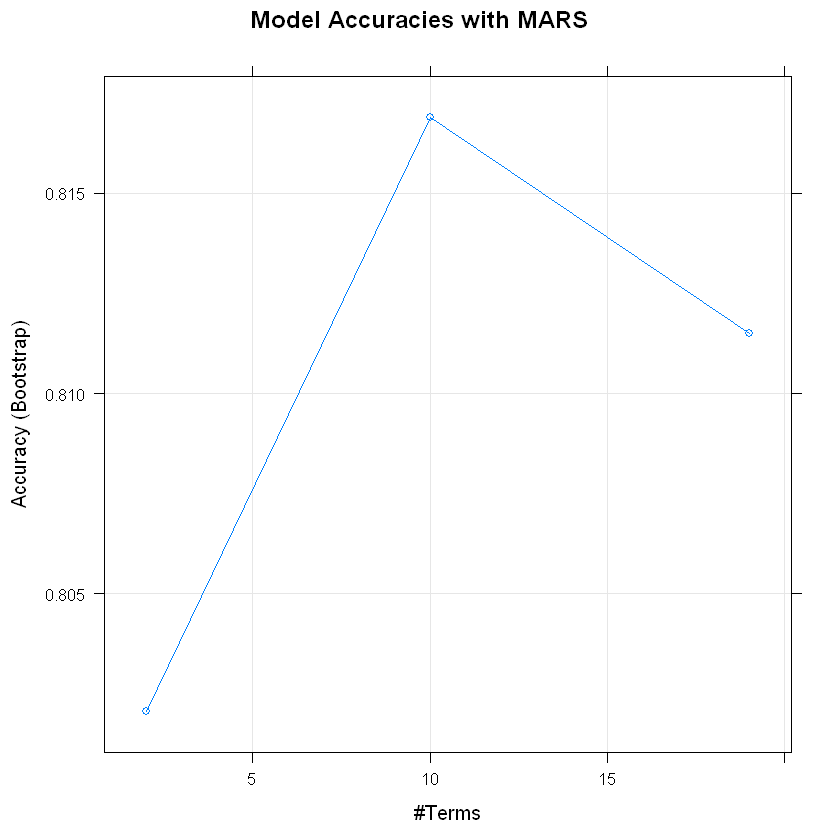

In [46]:
plot(model_mars, main="Model Accuracies with MARS")

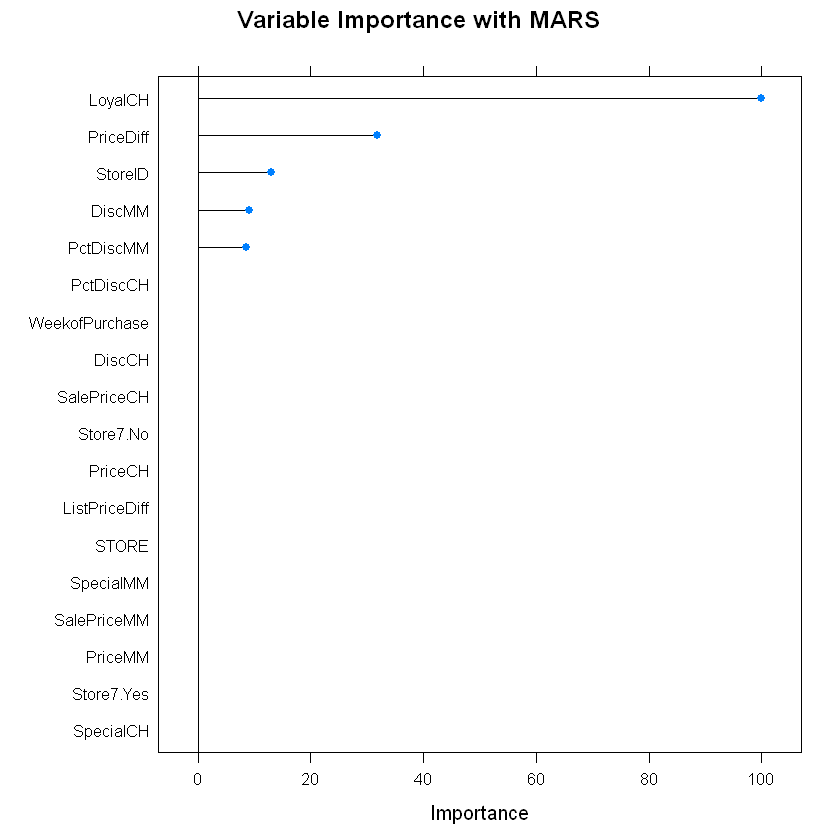

In [47]:
varimp_mars <- varImp(model_mars)
plot(varimp_mars, main="Variable Importance with MARS")

Nice visual presentation :)

in order to use the model to predict on new data, 
the data has to be preprocessed and transformed just the way we did on the training data

Missing Value imputation –> One-Hot Encoding –> Range Normalization

testData through these models in the same sequence:
preProcess_missingdata_model –> dummies_model –> preProcess_range_model

In [49]:
# Step 1: Impute missing values 
testData2 <- predict(preProcess_missingdata_model, testData)  

# Step 2: Create one-hot encodings (dummy variables)
testData3 <- predict(dummies_model, testData2)

# Step 3: Transform the features to range between 0 and 1
testData4 <- predict(preProcess_range_model, testData3)

# View
head(testData4[, 1:10])

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM
2,0.23529412,0,0.150,0.5000000,0.00,0.375,0,1,0.6000352,0.4545455
3,0.35294118,0,0.425,0.6666667,0.34,0.000,0,0,0.6800414,0.8181818
6,0.05882353,1,0.000,0.5000000,0.00,0.000,0,1,0.9652913,0.7272727
7,0.09803922,1,0.000,0.5000000,0.00,0.500,1,1,0.9722459,0.3636364
9,0.15686275,1,0.150,0.5000000,0.00,0.500,0,0,0.9822616,0.3636364
13,0.96078431,1,0.750,0.7333333,0.00,0.675,0,1,0.9927734,0.3636364


In [50]:
# Predict on testData
predicted <- predict(model_mars, testData4)
head(predicted)

[1] CH CH CH CH CH CH
Levels: CH MM

In [51]:
# Compute the confusion matrix
confusionMatrix(reference = testData$Purchase, data = predicted, mode='everything', positive='MM')

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 117  20
        MM  13  63
                                          
               Accuracy : 0.8451          
                 95% CI : (0.7894, 0.8909)
    No Information Rate : 0.6103          
    P-Value [Acc > NIR] : 6.311e-14       
                                          
                  Kappa : 0.6692          
 Mcnemar's Test P-Value : 0.2963          
                                          
            Sensitivity : 0.7590          
            Specificity : 0.9000          
         Pos Pred Value : 0.8289          
         Neg Pred Value : 0.8540          
              Precision : 0.8289          
                 Recall : 0.7590          
                     F1 : 0.7925          
             Prevalence : 0.3897          
         Detection Rate : 0.2958          
   Detection Prevalence : 0.3568          
      Balanced Accuracy : 0.8295          
                              

###  hyperparameter tuning to optimize the model for better performance

two main ways to do hyper parameter tuning using the train():

    Set the tuneLength
    Define and set the tuneGrid


train() function takes a trControl argument that accepts the output of trainControl().

Inside trainControl() you can control how the train() will:

    Cross validation method to use.
    How the results should be summarised using a summary function


Cross validation method can be one amongst:

    ‘boot’: Bootstrap sampling
    ‘boot632’: Bootstrap sampling with 63.2% bias correction applied
    ‘optimism_boot’: The optimism bootstrap estimator
    ‘boot_all’: All boot methods.
    ‘cv’: k-Fold cross validation
    ‘repeatedcv’: Repeated k-Fold cross validation
    ‘oob’: Out of Bag cross validation
    ‘LOOCV’: Leave one out cross validation
    ‘LGOCV’: Leave group out cross validation

The summaryFunction can be twoClassSummary if Y is binary class or multiClassSummary if the Y has more than 2 categories.

By setting the classProbs=T the probability scores are generated instead of directly predicting the class based on a predetermined cutoff of 0.5.

In [52]:
# Define the training control
fitControl <- trainControl(
    method = 'cv',                   # k-fold cross validation
    number = 5,                      # number of folds
    savePredictions = 'final',       # saves predictions for optimal tuning parameter
    classProbs = T,                  # should class probabilities be returned
    summaryFunction=twoClassSummary  # results summary function
) 

In the train() function we used before, plus, additionally set the tuneLength, trControl and metric

In [53]:
# Step 1: Tune hyper parameters by setting tuneLength
set.seed(100)
model_mars2 = train(Purchase ~ ., data=trainData, method='earth', tuneLength = 5, metric='ROC', trControl = fitControl)
model_mars2

# Step 2: Predict on testData and Compute the confusion matrix
predicted2 <- predict(model_mars2, testData4)
confusionMatrix(reference = testData$Purchase, data = predicted2, mode='everything', positive='MM')

Multivariate Adaptive Regression Spline 

857 samples
 18 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 686, 686, 686, 685, 685 
Resampling results across tuning parameters:

  nprune  ROC        Sens       Spec     
   2      0.8738876  0.8698718  0.7036635
   6      0.8958683  0.8623077  0.7423338
  10      0.8872985  0.8623260  0.7213478
  14      0.8897942  0.8623260  0.7213478
  19      0.8897942  0.8623260  0.7213478

Tuning parameter 'degree' was held constant at a value of 1
ROC was used to select the optimal model using  the largest value.
The final values used for the model were nprune = 6 and degree = 1.

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 116  20
        MM  14  63
                                          
               Accuracy : 0.8404          
                 95% CI : (0.7841, 0.8869)
    No Information Rate : 0.6103          
    P-Value [Acc > NIR] : 2.164e-13       
                                          
                  Kappa : 0.66            
 Mcnemar's Test P-Value : 0.3912          
                                          
            Sensitivity : 0.7590          
            Specificity : 0.8923          
         Pos Pred Value : 0.8182          
         Neg Pred Value : 0.8529          
              Precision : 0.8182          
                 Recall : 0.7590          
                     F1 : 0.7875          
             Prevalence : 0.3897          
         Detection Rate : 0.2958          
   Detection Prevalence : 0.3615          
      Balanced Accuracy : 0.8257          
                              

### Mars uses ROC.. which is highest for 6

#### Now using tue grid parameters 

In [55]:
# Step 1: Define the tuneGrid
marsGrid <-  expand.grid(nprune = c(2, 4, 6, 8, 10), 
                        degree = c(1, 2, 3))

# Step 2: Tune hyper parameters by setting tuneGrid
set.seed(100)
model_mars3 = train(Purchase ~ ., data=trainData, method='earth', metric='ROC', tuneGrid = marsGrid, trControl = fitControl)
model_mars3

# Step 3: Predict on testData and Compute the confusion matrix
predicted3 <- predict(model_mars3, testData4)
confusionMatrix(reference = testData$Purchase, data = predicted3, mode='everything', positive='MM')

Multivariate Adaptive Regression Spline 

857 samples
 18 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 686, 686, 686, 685, 685 
Resampling results across tuning parameters:

  degree  nprune  ROC        Sens       Spec     
  1        2      0.8738876  0.8698718  0.7036635
  1        4      0.8934647  0.8680220  0.7483039
  1        6      0.8958683  0.8623077  0.7423338
  1        8      0.8953497  0.8565751  0.7393487
  1       10      0.8872985  0.8623260  0.7213478
  2        2      0.8130335  0.8354762  0.6976934
  2        4      0.8928713  0.8699634  0.7422886
  2        6      0.8935170  0.8508791  0.7452736
  2        8      0.8962201  0.8584799  0.7843962
  2       10      0.8988934  0.8642308  0.7724559
  3        2      0.8510259  0.8794872  0.6320217
  3        4      0.8924517  0.8737729  0.7273632
  3        6      0.8911406  0.8470513  0.7663501
  3        8      0.8930491  0.8661172  0.7874265
  3 

Confusion Matrix and Statistics

          Reference
Prediction  CH  MM
        CH 110  18
        MM  20  65
                                          
               Accuracy : 0.8216          
                 95% CI : (0.7635, 0.8705)
    No Information Rate : 0.6103          
    P-Value [Acc > NIR] : 2.139e-11       
                                          
                  Kappa : 0.6266          
 Mcnemar's Test P-Value : 0.8711          
                                          
            Sensitivity : 0.7831          
            Specificity : 0.8462          
         Pos Pred Value : 0.7647          
         Neg Pred Value : 0.8594          
              Precision : 0.7647          
                 Recall : 0.7831          
                     F1 : 0.7738          
             Prevalence : 0.3897          
         Detection Rate : 0.3052          
   Detection Prevalence : 0.3991          
      Balanced Accuracy : 0.8146          
                              

### Caret has the resamples() function where you can provide multiple machine learning models and collectively evaluate them

### AdaBoost

In [56]:
set.seed(100)

# Train the model using adaboost
model_adaboost = train(Purchase ~ ., data=trainData, method='adaboost', tuneLength=2, trControl = fitControl)
model_adaboost

Loading required package: fastAdaboost


AdaBoost Classification Trees 

857 samples
 18 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 686, 686, 686, 685, 685 
Resampling results across tuning parameters:

  nIter  method         ROC        Sens       Spec     
   50    Adaboost.M1    0.8774557  0.8086996  0.7874265
   50    Real adaboost  0.7311635  0.8507143  0.7394844
  100    Adaboost.M1    0.8771023  0.8124725  0.7724559
  100    Real adaboost  0.6828147  0.8392857  0.7484848

ROC was used to select the optimal model using  the largest value.
The final values used for the model were nIter = 50 and method = Adaboost.M1.

### Random Forest

In [58]:
set.seed(100)

# Train the model using rf
model_rf = train(Purchase ~ ., data=trainData, method='rf', tuneLength=5, trControl = fitControl)
model_rf

Random Forest 

857 samples
 18 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 686, 686, 686, 685, 685 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
   2    0.8751711  0.8890293  0.6526459
   6    0.8855086  0.8583883  0.7304839
  10    0.8824556  0.8430403  0.7484848
  14    0.8810247  0.8373260  0.7484848
  18    0.8805559  0.8411722  0.7544550

ROC was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 6.

### xgBoost Dart
    wasnt there among caret's list of algos
### so used xgbTree 
    close enough

In [60]:
set.seed(100)

# Train the model using MARS
model_xgbDART = train(Purchase ~ ., data=trainData, method='xgbTree', tuneLength=5, trControl = fitControl, verbose=F)
model_xgbDART

Loading required package: xgboost


eXtreme Gradient Boosting 

857 samples
 18 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 686, 686, 686, 685, 685 
Resampling results across tuning parameters:

  eta  max_depth  colsample_bytree  subsample  nrounds  ROC        Sens     
  0.3  1          0.6               0.500       50      0.8981695  0.8832418
  0.3  1          0.6               0.500      100      0.8977194  0.8699267
  0.3  1          0.6               0.500      150      0.8971549  0.8814286
  0.3  1          0.6               0.500      200      0.8955219  0.8680403
  0.3  1          0.6               0.500      250      0.8942164  0.8699451
  0.3  1          0.6               0.625       50      0.8954363  0.8699267
  0.3  1          0.6               0.625      100      0.8948572  0.8737729
  0.3  1          0.6               0.625      150      0.8921472  0.8622894
  0.3  1          0.6               0.625      200      0.8926765  0.862271

In [62]:
### SVM

In [63]:
set.seed(100)

# Train the model using MARS
model_svmRadial = train(Purchase ~ ., data=trainData, method='svmRadial', tuneLength=15, trControl = fitControl)
model_svmRadial

Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



Support Vector Machines with Radial Basis Function Kernel 

857 samples
 18 predictor
  2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 686, 686, 686, 685, 685 
Resampling results across tuning parameters:

  C        ROC        Sens       Spec     
     0.25  0.8907101  0.8909890  0.7274989
     0.50  0.8942617  0.8929121  0.7364993
     1.00  0.8945757  0.8891209  0.7364993
     2.00  0.8951246  0.8968132  0.7274536
     4.00  0.8882141  0.8910623  0.7184984
     8.00  0.8838651  0.8872527  0.6944369
    16.00  0.8798716  0.8795604  0.7064224
    32.00  0.8675045  0.8815018  0.6794663
    64.00  0.8566042  0.8662454  0.6764812
   128.00  0.8473979  0.8700000  0.6736318
   256.00  0.8304468  0.8623443  0.6646766
   512.00  0.8154694  0.8604212  0.6647218
  1024.00  0.8084394  0.8776374  0.6316147
  2048.00  0.8080512  0.8852747  0.5270918
  4096.00  0.8086072  0.8853297  0.5719584

Tuning parameter 'sigma' was held constant at a

In [64]:
# Compare model performances using resample()
models_compare <- resamples(list(ADABOOST=model_adaboost, RF=model_rf, XGTREE_OR_XGBDART=model_xgbDART, MARS=model_mars3, SVM=model_svmRadial))

# Summary of the models performances
summary(models_compare)


Call:
summary.resamples(object = models_compare)

Models: ADABOOST, RF, XGTREE_OR_XGBDART, MARS, SVM 
Number of resamples: 5 

ROC 
                       Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
ADABOOST          0.8521096 0.8679679 0.8767591 0.8774557 0.8881674 0.9022743
RF                0.8763634 0.8777056 0.8864093 0.8855086 0.8915423 0.8955224
XGTREE_OR_XGBDART 0.8915040 0.8919913 0.9017768 0.9009226 0.9079602 0.9113806
MARS              0.8784993 0.8981774 0.9041933 0.8988934 0.9052813 0.9083156
SVM               0.8747475 0.8909026 0.8941720 0.8951246 0.8949483 0.9208525
                  NA's
ADABOOST             0
RF                   0
XGTREE_OR_XGBDART    0
MARS                 0
SVM                  0

Sens 
                       Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
ADABOOST          0.7788462 0.7884615 0.8000000 0.8086996 0.8095238 0.8666667
RF                0.8269231 0.8269231 0.8666667 0.8583883 0.8857143 0.8857143
XGTREE_OR_XGBDART 0.

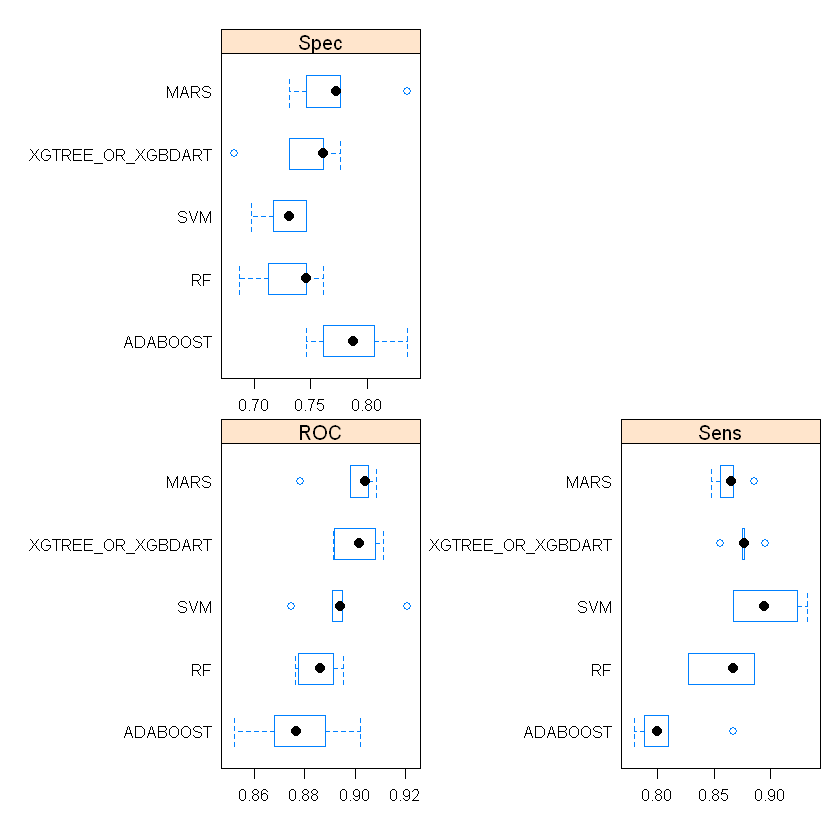

In [65]:
# Draw box plots to compare models
scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(models_compare, scales=scales)

XG Tree has hisghest ROC.. 
wins by the whisker.. literally... look at the box plot above :D  

Sensitivity / true positive rate/ recall/ probability of detection:: proportion of positives that are correctly identified as such  
Specificity (also called the true negative rate) measures the proportion of negatives that are correctly identified as such  

https://en.wikipedia.org/wiki/Sensitivity_and_specificity

SVM has higher sensitivity.. since we are concerned with the model's ability to detect true positives..  
Either way.. now there is enough data to make an informed decicion regarding which one among these is a good model

#### To summarize train() function once for each model, store the models and pass it to the resamples function

 ensemble predictions from multiple models using caretEnsemble

In [69]:
library(caretEnsemble)

# Stacking Algorithms - Run multiple algos in one call.
trainControl <- trainControl(method="repeatedcv", 
                             number=10, 
                             repeats=3,
                             savePredictions=TRUE, 
                             classProbs=TRUE)

#algorithmList <- c('rf', 'adaboost', 'earth', 'xgbDART', 'svmRadial')
algorithmList <- c('rf', 'adaboost', 'earth', 'xgbTree', 'svmRadial')

set.seed(100)
models <- caretList(Purchase ~ ., data=trainData, trControl=trainControl, methodList=algorithmList) 
results <- resamples(models)
summary(results)


Call:
summary.resamples(object = results)

Models: rf, adaboost, earth, xgbTree, svmRadial 
Number of resamples: 30 

Accuracy 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf        0.6896552 0.7882353 0.8023256 0.8052527 0.8250684 0.8941176    0
adaboost  0.7058824 0.7771204 0.8011628 0.7962704 0.8139535 0.8823529    0
earth     0.7209302 0.7930233 0.8187415 0.8168097 0.8367305 0.8604651    0
xgbTree   0.7325581 0.8023256 0.8314402 0.8300380 0.8563269 0.8953488    0
svmRadial 0.7558140 0.7948276 0.8362517 0.8273516 0.8600547 0.9176471    0

Kappa 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
rf        0.3232498 0.5277087 0.5705040 0.5775837 0.6222222 0.7783251    0
adaboost  0.3842365 0.5273752 0.5776917 0.5706474 0.6189906 0.7576967    0
earth     0.4102857 0.5700036 0.6148850 0.6102871 0.6580869 0.7147595    0
xgbTree   0.4490251 0.5767159 0.6453726 0.6379834 0.6943680 0.7848805    0
svmRadial 0.4685109 0.5611365 0.646478

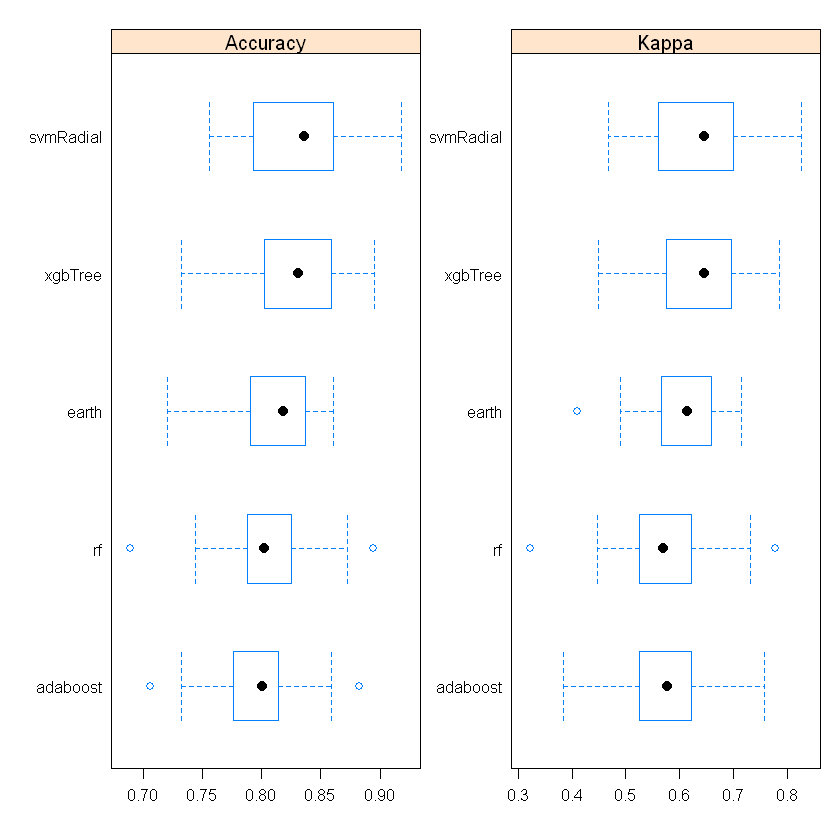

In [70]:
# Box plots to compare models
scales <- list(x=list(relation="free"), y=list(relation="free"))
bwplot(results, scales=scales)

It is possible to combine these predicted values from multiple models somehow and make a new ensemble that predicts better  
caretStack()

In [71]:
# Create the trainControl
set.seed(101)
stackControl <- trainControl(method="repeatedcv", 
                             number=10, 
                             repeats=3,
                             savePredictions=TRUE, 
                             classProbs=TRUE)

# Ensemble the predictions of `models` to form a new combined prediction based on glm
stack.glm <- caretStack(models, method="glm", metric="Accuracy", trControl=stackControl)
print(stack.glm)

A glm ensemble of 2 base models: rf, adaboost, earth, xgbTree, svmRadial

Ensemble results:
Generalized Linear Model 

2571 samples
   5 predictor
   2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 2313, 2314, 2314, 2314, 2314, 2314, ... 
Resampling results:

  Accuracy  Kappa    
  0.830682  0.6391797



The models object has been defined already as above.. 

A point to consider: The ensembles tend to perform better if the predictions are less correlated with each other.

So you may want to try passing different types of models,   
both high and low performing rather than just stick to passing high accuracy models to the caretStack

In [73]:
print(stack.glm)

A glm ensemble of 2 base models: rf, adaboost, earth, xgbTree, svmRadial

Ensemble results:
Generalized Linear Model 

2571 samples
   5 predictor
   2 classes: 'CH', 'MM' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 2313, 2314, 2314, 2314, 2314, 2314, ... 
Resampling results:

  Accuracy  Kappa    
  0.830682  0.6391797



In [74]:
# Predict on testData
stack_predicteds <- predict(stack.glm, newdata=testData4)
head(stack_predicteds)

[1] CH CH CH CH CH MM
Levels: CH MM